# Rainfall Analysis in Australia

Introduction: In this short project, I am going to analyze the rainfall data taken from Australian Bureau of Meteorology. Our main goal is to understand the rainfall pattern in Australia from 2007 to 2017. Alongside this main focus we would like to have some more insight on humidity, temperature and pressure and wind gust speed from the additional data given. The raw data mainly has 23 columns about different parameters which was mainly used for rainfall prediction using machine learning. But to make easy we will be taking the columns that are relevant for our project. 

Tools & Techniques: Basic python, Pandas, Matplotlib, seaborn

Source & Acknowledgements:

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.


## Downloading the Dataset

I have used kaggle as the source of my data. You can follow this link to downlaod the data , https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

I have used opendataset library to download the data and you can see the process below. But you can also directly download it in your system from the link given and upload it to the directory where jupyter notebook is present. 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: skmuhammadasif
Your Kaggle Key: ········


100%|██████████| 3.83M/3.83M [00:00<00:00, 68.4MB/s]

In [3]:
project_name = "rainfall-analysis-in-australia" # change this (use lowercase letters and hyphens only)

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project = project_name, file = 'weatherAUS.csv')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sheikhasif-buet13/rainfall-analysis-in-australia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia


'https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia'

## Data Preparation and Cleaning


Data import: First, lets read the data file using pandas read_csv function and create a raw data frame. From this raw data frame we will create a subset to work with. 


In [9]:
import pandas as pd

In [10]:
rainfall_raw_df = pd.read_csv('weatherAUS.csv')

In [18]:
rainfall_raw_df.sample(14)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
99381,2017-02-14,Adelaide,15.1,28.1,0.0,NaN,NaN,WSW,24.0,ESE,...,68.0,50.0,1020.3,1017.4,NaN,NaN,18.2,25.1,No,No
21805,2010-11-18,NorfolkIsland,18.3,22.5,3.4,3.0,4.4,SE,31.0,SE,...,96.0,89.0,1012.5,1012.3,8.0,7.0,19.6,20.1,Yes,No
114591,2017-05-28,Witchcliffe,9.7,16.2,0.4,NaN,NaN,N,17.0,NaN,...,100.0,72.0,1028.7,1025.7,NaN,NaN,11.8,14.8,No,No
74772,2016-11-30,Nhil,9.1,24.5,0.0,NaN,NaN,SW,39.0,SSW,...,71.0,39.0,1009.9,1008.0,NaN,NaN,14.6,23.0,No,No
126246,2015-11-18,SalmonGums,12.0,25.0,0.0,NaN,NaN,W,43.0,W,...,37.0,33.0,NaN,NaN,NaN,NaN,21.8,22.3,No,No
122433,2013-08-28,Perth,8.4,19.4,27.0,2.6,8.4,NW,31.0,NW,...,84.0,59.0,1012.6,1013.3,2.0,4.0,14.0,17.4,Yes,No
37126,2010-08-21,WaggaWagga,4.3,12.4,0.2,2.2,6.9,W,43.0,WNW,...,85.0,56.0,1019.5,1018.3,7.0,3.0,7.1,12.2,No,No
71282,2011-07-09,Mildura,4.4,13.9,0.0,1.0,3.0,W,31.0,WNW,...,94.0,55.0,1026.6,1023.5,7.0,7.0,7.8,13.8,No,No
8917,2017-02-05,Cobar,27.1,42.8,3.0,NaN,NaN,N,46.0,NNE,...,38.0,15.0,1009.6,1005.9,NaN,1.0,31.8,41.6,Yes,No
119482,2014-04-27,PerthAirport,16.9,23.8,9.2,2.8,7.9,WNW,48.0,W,...,78.0,69.0,1006.3,1007.3,7.0,6.0,21.3,21.4,Yes,Yes


Now, Let's look at the basic information about the data to get the overall idea of the raw data. From here we can decide which column to take and which to drop.

In [11]:
rainfall_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The above data tells us that Evaporation, sunshine, Cloud9am, Cloud3pm these fields have so many non-null objects. So we can ingnore them while creating our subset. As we like to work with numeric values in this analysis, we would like to drop a few other columns with object datatype. So we will select our desired column in a list

In [12]:
selected_columns = [
    #basic data
    'Date',
    'Location',
    'Rainfall',
    # wind data
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
    #Humidity Data
    'Humidity9am',
    'Humidity3pm',
    #pressure Data
    'Pressure9am',
    'Pressure3pm',
    #Temperature Data
    'MinTemp',
    'MaxTemp',
    'Temp9am',
    'Temp3pm'
]

In [89]:
len(selected_columns) #to check the no of columns in our chosen subset of the raw data

14

Now we will create a new dataframe to work with, we will name this dataset as rainfall_df

In [14]:
rainfall_df = rainfall_raw_df[selected_columns].copy()

Now, lets get the idea about some basic information about this new dataframe

In [91]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145456 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145456 non-null  datetime64[ns]
 1   Location       145456 non-null  object        
 2   Rainfall       142195 non-null  float64       
 3   WindGustSpeed  135193 non-null  float64       
 4   WindSpeed9am   143689 non-null  float64       
 5   WindSpeed3pm   142394 non-null  float64       
 6   Humidity9am    142802 non-null  float64       
 7   Humidity3pm    140949 non-null  float64       
 8   Pressure9am    130391 non-null  float64       
 9   Pressure3pm    130428 non-null  float64       
 10  MinTemp        143971 non-null  float64       
 11  MaxTemp        144195 non-null  float64       
 12  Temp9am        143689 non-null  float64       
 13  Temp3pm        141847 non-null  float64       
 14  year           145456 non-null  int64         
 15  

Now, we will parse the Date to get day, month, year and weekday and add them as columns in our dataframe for the analysis purpose. Again, we will take the average of 9am and 3pm data for humidity, pressure and temperature and add them to our dataframe

In [15]:
rainfall_df['Date'] = pd.to_datetime(rainfall_df.Date)

In [22]:
rainfall_df['year'] = pd.DatetimeIndex(rainfall_df.Date).year
rainfall_df['month'] = pd.DatetimeIndex(rainfall_df.Date).month
rainfall_df['day'] = pd.DatetimeIndex(rainfall_df.Date).day
rainfall_df['weekday'] = pd.DatetimeIndex(rainfall_df.Date).weekday

In [23]:
rainfall_df['AvgHumidity'] = (rainfall_df.Humidity9am + rainfall_df.Humidity3pm)/2
rainfall_df['AvgTemp'] = (rainfall_df.Temp9am + rainfall_df.Temp3pm)/2
rainfall_df['AvgPressure'] = (rainfall_df.Pressure9am + rainfall_df.Pressure3pm)/2

Lets describe our dataframe to get a good idea of our data frame

In [20]:
rainfall_df.shape #to check the shape of our subset in its current form

(145460, 21)

In [21]:
rainfall_df.describe()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,MinTemp,MaxTemp,Temp9am,Temp3pm,year,month,day,weekday,AvgHumidity,AvgTemp,AvgPressure
count,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143975.000000,144199.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000,145460.000000,140186.000000,141213.000000,130171.000000
mean,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,12.194034,23.221348,16.990631,21.68339,2012.769751,6.399615,15.712258,2.999684,60.154031,19.324471,1016.453029
std,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.398495,7.119049,6.488753,6.93665,2.537684,3.427262,8.794789,1.999292,18.182158,6.455624,7.003715
min,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-8.500000,-4.800000,-7.200000,-5.40000,2007.000000,1.000000,1.000000,0.000000,0.000000,-6.300000,979.750000
25%,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,7.600000,17.900000,12.300000,16.60000,2011.000000,3.000000,8.000000,1.000000,48.500000,14.550000,1011.700000
50%,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,12.000000,22.600000,16.700000,21.10000,2013.000000,6.000000,16.000000,3.000000,61.500000,18.950000,1016.400000
75%,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,16.900000,28.200000,21.600000,26.40000,2015.000000,9.000000,23.000000,5.000000,73.000000,23.900000,1021.150000
max,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,33.900000,48.100000,40.200000,46.70000,2017.000000,12.000000,31.000000,6.000000,100.000000,41.600000,1040.050000


At this point lets do some more data cleaning. Relative Humidity of 0% is an impossibility. So we can drop the values that have RH = 0. 

In [24]:
rainfall_df.drop(rainfall_df[rainfall_df.Humidity9am == 0].index, inplace=True)
rainfall_df.drop(rainfall_df[rainfall_df.Humidity3pm == 0].index, inplace=True)

In [25]:
rainfall_df.Humidity9am.min()

1.0

Now we can see the minimum value of RH is 1.0 which is acceptable 

## Exploratory Analysis and Visualization

Here we will analyse our data to get the general trends about the data. We will not go into detail as this is not the scope of our work. We will try to draw good number of plots to have a good visualization.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First we will learn about total number of unique location and where were are the most number of data present. 

In [29]:
rainfall_df.Location.nunique()

49

In [28]:
most_rainfall_record = rainfall_df.Location.value_counts().head(15)
most_rainfall_record

Canberra        3436
Sydney          3344
Darwin          3193
Melbourne       3193
Brisbane        3193
Adelaide        3193
Perth           3193
Hobart          3193
Albany          3040
MountGambier    3040
Ballarat        3040
Townsville      3040
GoldCoast       3040
Cairns          3040
Launceston      3040
Name: Location, dtype: int64

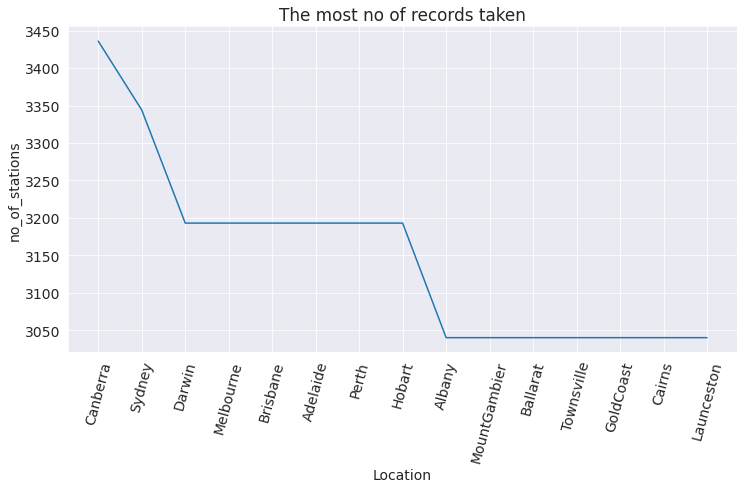

In [30]:
plt.figure(figsize=(12,6))
plt.plot(most_rainfall_record.index,most_rainfall_record)
plt.xticks(rotation = 75)
plt.xlabel('Location')
plt.ylabel('no_of_stations')
plt.title('The most no of records taken');

The figure tells us about the top 15 location in Australia where was the most number of records were taken. 

# Comparison of Rainfall in the first five months between Canberra, Darwin & Cairns
To understand the rainfall pattern in Canberra,Darwin & Cairns we can draw some plots including, line chart, barplot and historgram.
We will look at the very first 5 month rainfall in our data to compare Canberra, Darwin & Cairns. We are choosing these three cities as rainfall is generally higher in these cities and from the record graph above we can see they are among the top location where most numbers of records are taken. 

In [31]:
rainfall_df.Location[rainfall_df.Location == 'Canberra']

45587    Canberra
45588    Canberra
45589    Canberra
45590    Canberra
45591    Canberra
           ...   
49018    Canberra
49019    Canberra
49020    Canberra
49021    Canberra
49022    Canberra
Name: Location, Length: 3436, dtype: object

We can do the thing both using location index and by passing boolean series. 

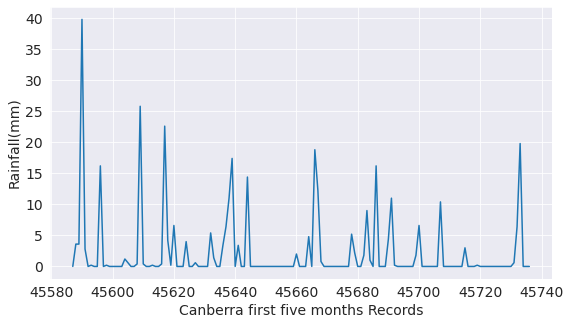

In [33]:
plt.plot(rainfall_df.Rainfall.iloc[45587:49022].head(150))
plt.xlabel('Canberra first five months Records')
plt.ylabel('Rainfall(mm)');

To get the view of full data we can look at the figure below

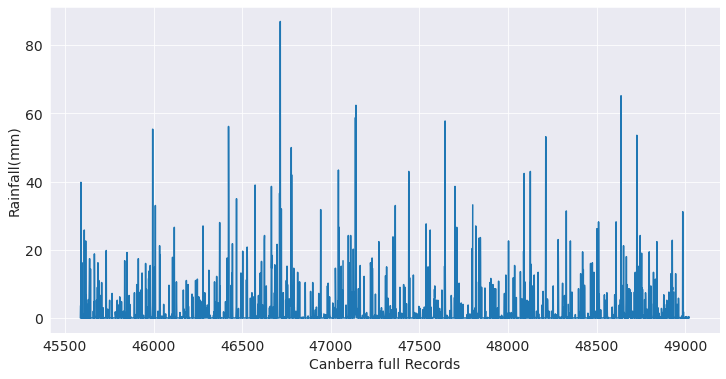

In [45]:
plt.figure(figsize = (12,6))
plt.plot(rainfall_df.Rainfall[rainfall_df.Location[rainfall_df.Location == 'Canberra'].index])
plt.xlabel('Canberra full Records')
plt.ylabel('Rainfall(mm)');

In [46]:
rainfall_df.Location[rainfall_df.Location == 'Darwin']

139111    Darwin
139112    Darwin
139113    Darwin
139114    Darwin
139115    Darwin
           ...  
142299    Darwin
142300    Darwin
142301    Darwin
142302    Darwin
142303    Darwin
Name: Location, Length: 3193, dtype: object

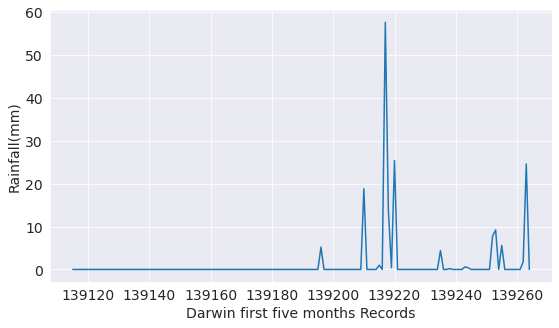

In [47]:
plt.plot(rainfall_df.Rainfall.iloc[139111:142303].head(150))
plt.xlabel('Darwin first five months Records')
plt.ylabel('Rainfall(mm)');

In [48]:
rainfall_df.Location[rainfall_df.Location == 'Cairns']

87200    Cairns
87201    Cairns
87202    Cairns
87203    Cairns
87204    Cairns
          ...  
90235    Cairns
90236    Cairns
90237    Cairns
90238    Cairns
90239    Cairns
Name: Location, Length: 3040, dtype: object

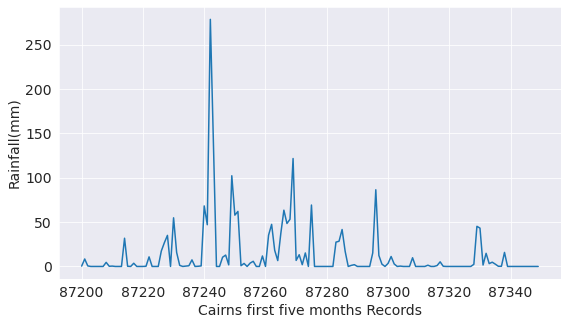

In [49]:
plt.plot(rainfall_df.Rainfall.iloc[87200:90239].head(150))
plt.xlabel('Cairns first five months Records')
plt.ylabel('Rainfall(mm)');

In the above curve we see that in the top 5 month records of Canberra, there are intermittent spikes which are ocurred time to time. In Darwin, the rainfall is very low while in Cairns we see that rainfall is higher which is supported by the fact. Because in Australia, The wettest regions are around Cairns in far north Queensland and the west coast of Tasmania around Strahan, about 1600 kilometres to the south.You can verify the information at : https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/climatic-extremes

# Histograms of rainfall in Canberra, Darwin & Cairns

Histograms are commonly used in statistics to demonstrate how many of a certain type of variable occurs within a specific range. 

In [54]:
NonZeroRain_df = rainfall_df[rainfall_df.Rainfall > 0]

In [53]:
NonZeroRain_df.Location[NonZeroRain_df.Location == 'Canberra']

45588    Canberra
45589    Canberra
45590    Canberra
45591    Canberra
45593    Canberra
           ...   
49011    Canberra
49012    Canberra
49013    Canberra
49018    Canberra
49020    Canberra
Name: Location, Length: 997, dtype: object

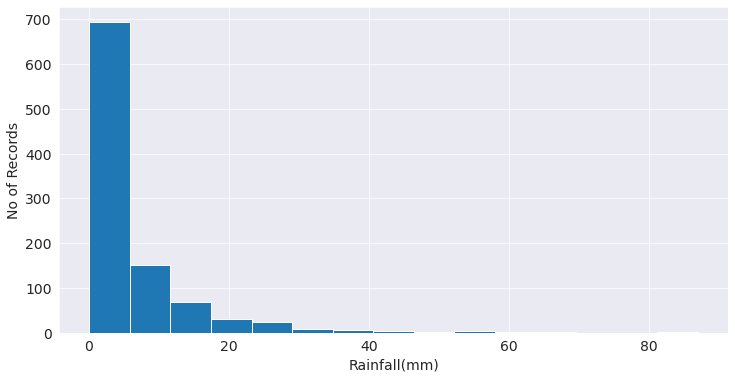

In [62]:
plt.figure(figsize=(12, 6))
plt.hist(NonZeroRain_df.Rainfall[NonZeroRain_df.Location == 'Canberra'], bins = 15)

plt.xlabel('Rainfall(mm)')
plt.ylabel('No of Records');

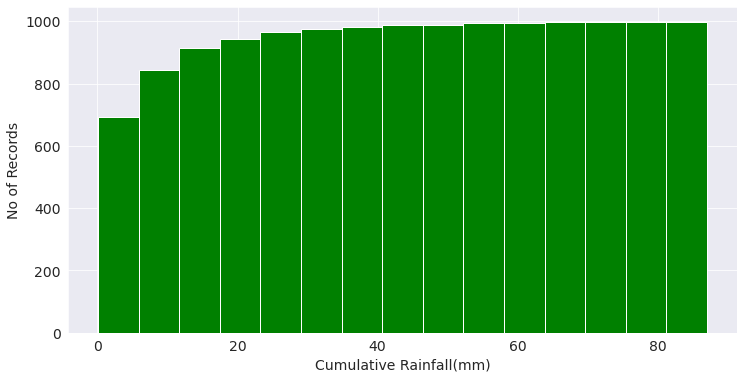

In [75]:
plt.figure(figsize=(12, 6))
plt.hist(NonZeroRain_df.Rainfall[NonZeroRain_df.Location == 'Canberra'], 
         bins = 15, cumulative = True, color = 'green', histtype = 'barstacked')

plt.xlabel('Cumulative Rainfall(mm)')
plt.ylabel('No of Records');

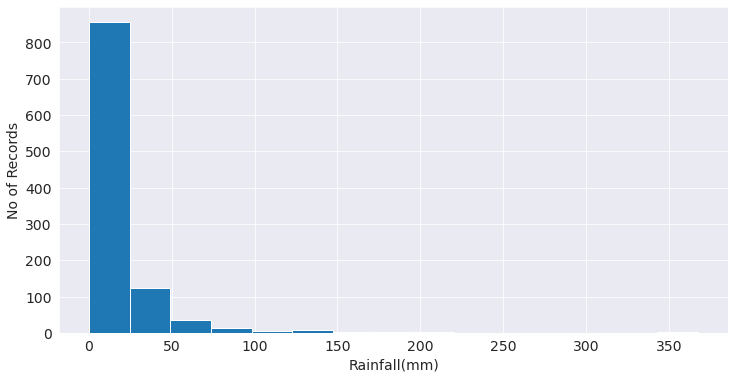

In [60]:
plt.figure(figsize=(12, 6))
plt.hist(NonZeroRain_df.Rainfall[NonZeroRain_df.Location == 'Darwin'], bins = 15)

plt.xlabel('Rainfall(mm)')
plt.ylabel('No of Records');

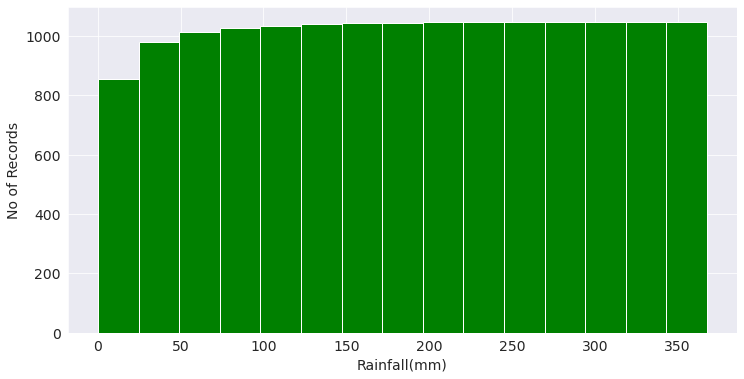

In [77]:
plt.figure(figsize=(12, 6))
plt.hist(NonZeroRain_df.Rainfall[NonZeroRain_df.Location == 'Darwin'],
         bins = 15, cumulative = True, color = 'green', histtype = 'barstacked')

plt.xlabel('Rainfall(mm)')
plt.ylabel('No of Records');

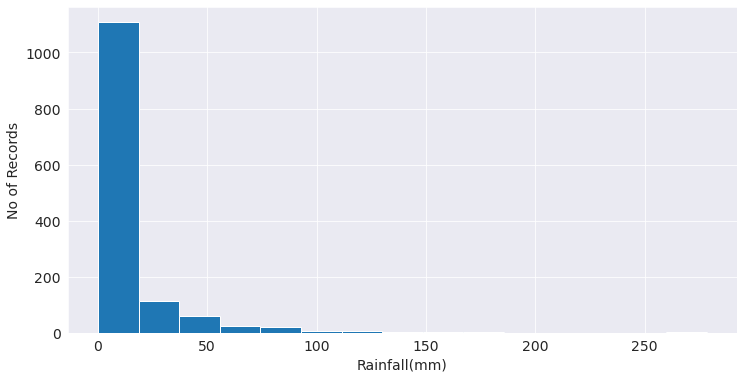

In [58]:
plt.figure(figsize=(12, 6))
plt.hist(NonZeroRain_df.Rainfall[NonZeroRain_df.Location == 'Cairns'], bins = 15)

plt.xlabel('Rainfall(mm)')
plt.ylabel('No of Records');

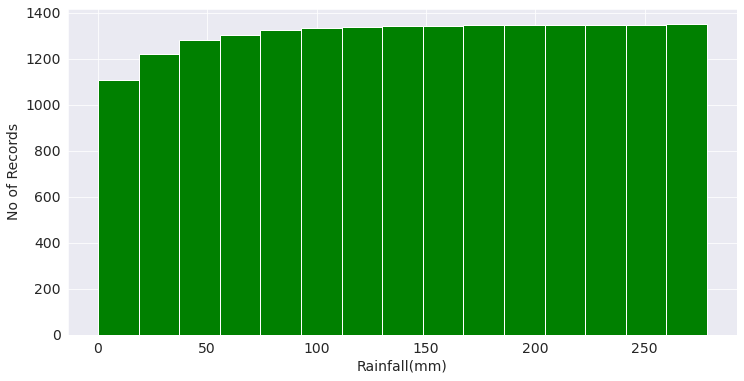

In [76]:
plt.figure(figsize=(12, 6))
plt.hist(NonZeroRain_df.Rainfall[NonZeroRain_df.Location == 'Cairns'], 
         bins = 15, cumulative = True, color = 'green', histtype = 'barstacked')

plt.xlabel('Rainfall(mm)')
plt.ylabel('No of Records');

From the three histograms above we can see that cairns has more nonzero rainfall records.

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sheikhasif-buet13/rainfall-analysis-in-australia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia


'https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia'

# Mean, Sum, Range

We can count mean, sum and Range using functions. Interestingly, in seaborn, the barplot function automatically calculates the mean. So we will plot the mean with seaborn

In [79]:
year2014 = rainfall_df.year == 2014
year2007 = rainfall_df.year == 2007
year2015 = rainfall_df.year == 2015

In [80]:
rainfall_df[year2014].Rainfall.mean()

1.9664539863195123

## Mean rainfall in different years, month & location

To understand the rainfall pattern in 10 years, mean rainfall is the single most important pattern. We will now observe mean rainfall for different years, months and locations in Australia.

### Mean rainfall for different years

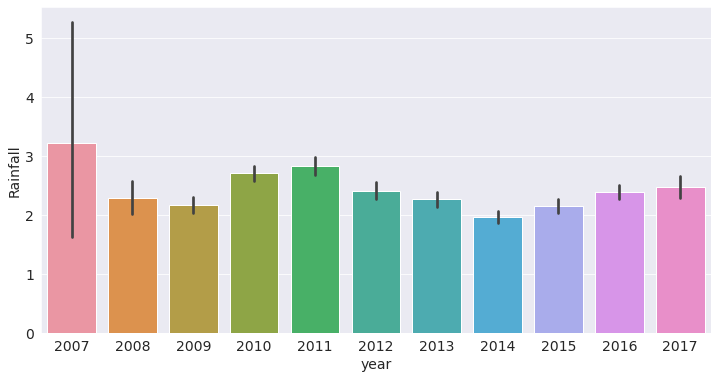

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x=rainfall_df.year, y=rainfall_df.Rainfall);

In [89]:
rainfall_df.Rainfall[rainfall_df.year == 2007].count()

61

In [91]:
rainfall_df.Rainfall[rainfall_df.year == 2010].count()

16422

In [90]:
rainfall_df.Rainfall[rainfall_df.year == 2011].count()

15125

It is seen that the mean rainfall was most in 2007 but with a higher rate of variation which is shown by the vertical line going through the bars. But it is not quite considerable as in 2007 the number of data taken are value low compared to other years. So from the counts of record and mean data from the graph we can say the mean rainfall was maximum within the period 2010-2011. Our reservation about the data is due to the variation of count between 2010 and 2011. if the number of records were same for both the year we could decide a single year with the highest mean rainfall. 

### Mean rainfall for different months

Now lets see the data for mean rainfall in different months. 

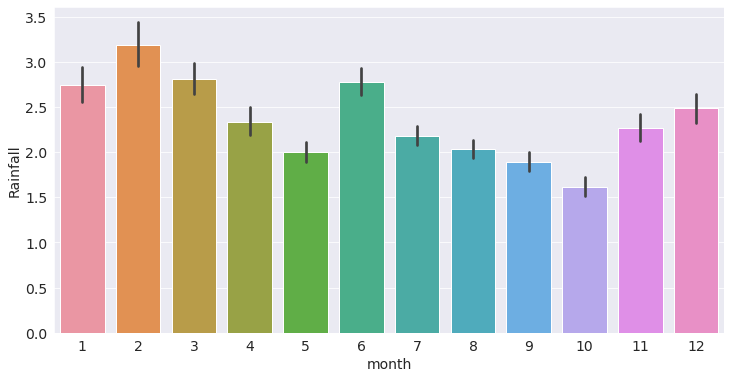

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rainfall_df.month, y=rainfall_df.Rainfall);

It is observed that the wettest month in 10 years was February. But, historically June is the most wet month in Australia. But, if we consider location wise monthly data we would get another pattern. As we are taking the total records altogether we have come up with this particular pattern. Because in our data there are regions with high rainfall and also region with lower rainfall. So, data from another region is affecting the pattern for another region. So, our data is only representative of overall australian data and not for particular locations. 

### Mean rainfall for different locations

Text(0.5, 1.0, 'Mean Rainfall in different Location')

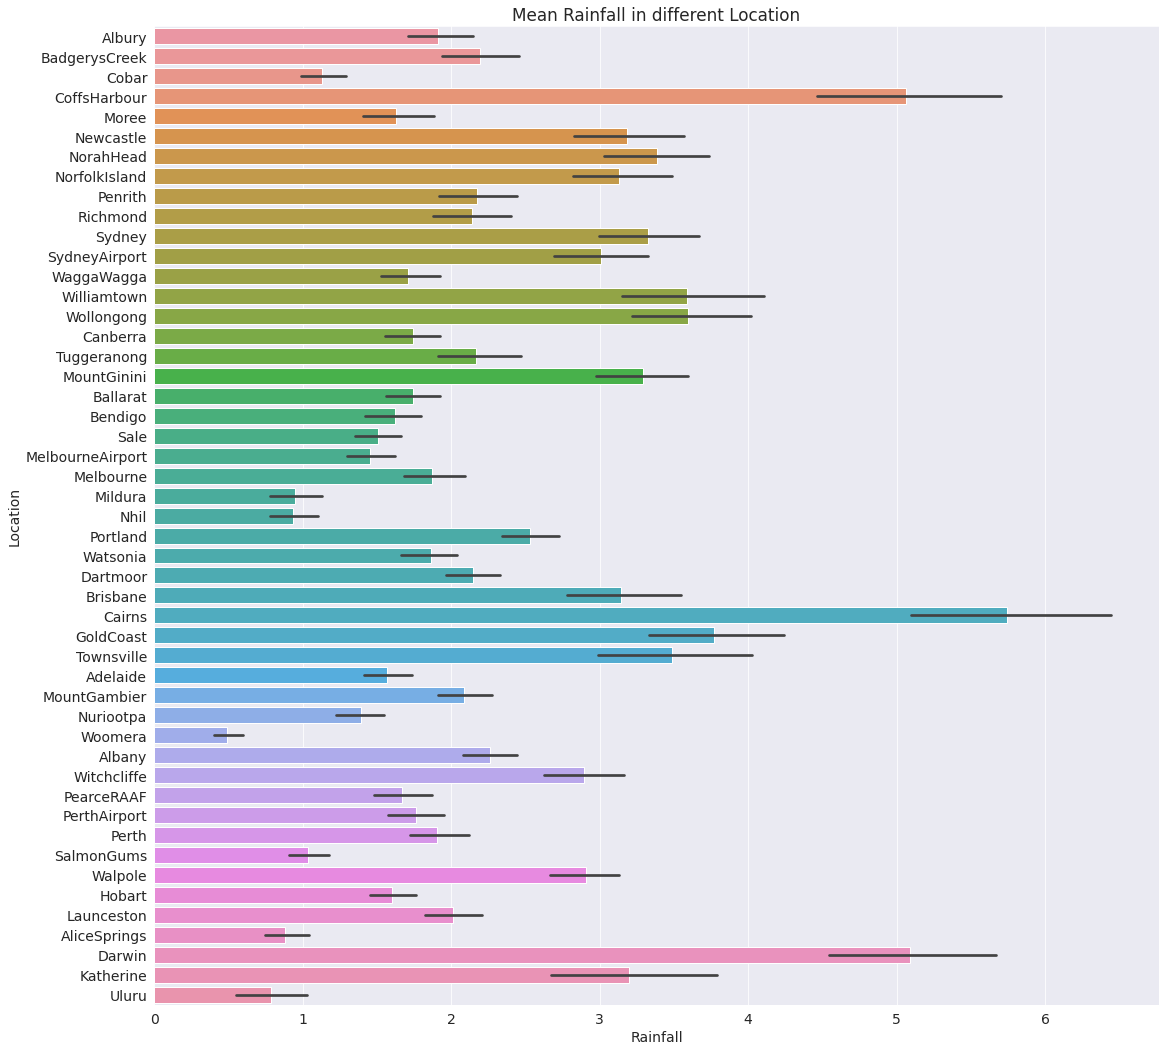

In [60]:
plt.figure(figsize=(18,18))
sns.barplot(x = rainfall_df.Rainfall,y=rainfall_df.Location)
plt.title('Mean Rainfall in different Location');

From the figure, it is evident that Cairns has the most mean rainfall in Australia and it is supported by fact. 

## Mean humidity in different years & month

<Figure size 864x432 with 0 Axes>

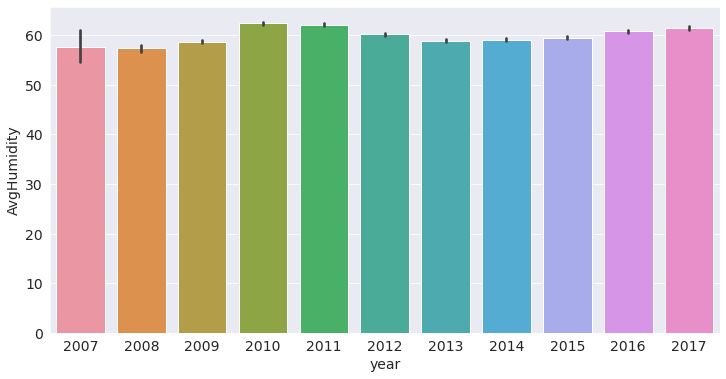

In [25]:
plt.figure(figsize = (12,6))
plt.figure(figsize=(12, 6))
sns.barplot(x=rainfall_df.year, y=rainfall_df.AvgHumidity);

<Figure size 864x432 with 0 Axes>

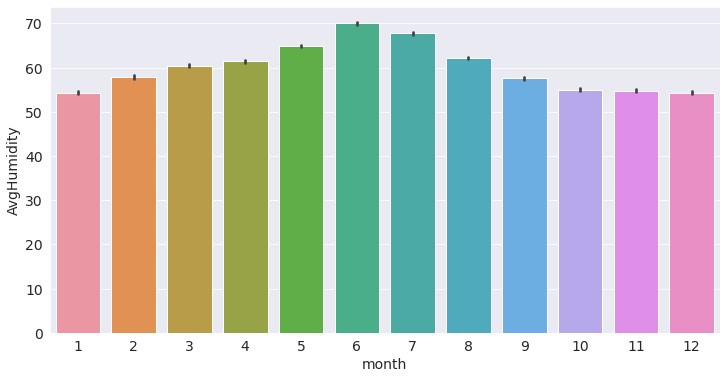

In [26]:
plt.figure(figsize = (12,6))
plt.figure(figsize=(12, 6))
sns.barplot(x=rainfall_df.month, y=rainfall_df.AvgHumidity);

From two charts above, we can decide that over the years Average Humidity didnt change much. As for most humid month, June is clearly the most humid month. Again we should say that, this is only true for the whole australian climate. As for a particular region we may encounter a different pattern altogether. 

## Relationship between Humidity & Rainfall

We will try to have a very little overview of the effect of rainfall on humidity for Canberra, Darwin & Cairns regions.

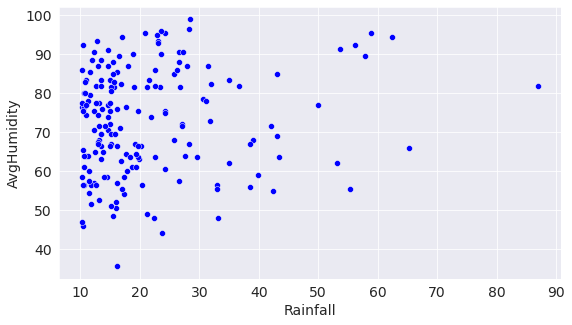

In [44]:
#canberra
sns.scatterplot(x=rainfall_df.Rainfall.iloc[45587:49022][rainfall_df.Rainfall>10].head(1000), 
                y=rainfall_df.AvgHumidity.iloc[45587:49022][rainfall_df.Rainfall>10].head(1000), color = 'Blue');


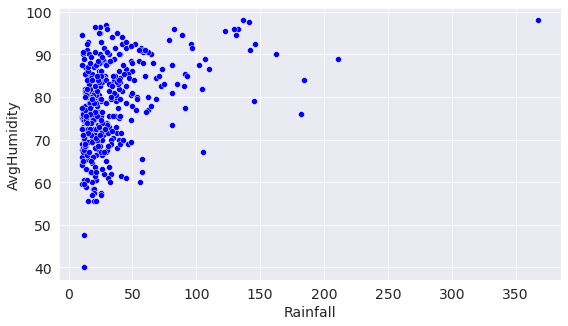

In [46]:
#Darwin
sns.scatterplot(x=rainfall_df.Rainfall.iloc[139111:142303][rainfall_df.Rainfall>10].head(1000), 
                y=rainfall_df.AvgHumidity.iloc[139111:1423032][rainfall_df.Rainfall>10].head(1000), color = 'Blue');


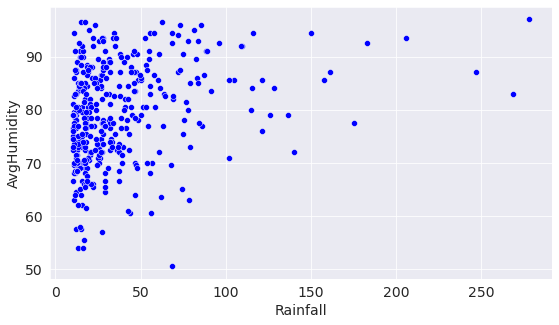

In [47]:
#Cairns
sns.scatterplot(x=rainfall_df.Rainfall.iloc[87200:90239][rainfall_df.Rainfall>10].head(1000), 
                y=rainfall_df.AvgHumidity.iloc[87200:90239][rainfall_df.Rainfall>10].head(1000), color = 'Blue');


From the three figures above, we see that when rainfall increases the Avg Humidity also increases which is pretty normal. As for lower rainfall we can see both higher and lower values of humidity. Clearly, there are other factors governing the scenario of higher humidity. The amount of moisture can be higher prior to rainfall also. So, this is not unprecedented. 

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [ ]:
import jovian

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sheikhasif-buet13/rainfall-analysis-in-australia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia


'https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia'

## Asking and Answering Questions

At this part of the project we would like to ask some fundamental questions about our data and answer them using python, pandas, matplotlib, seaborn to have a better idea of the data.



#### Q1: Where was the maximum rainfall recorded and when?

In [22]:
rainfall_df.Location[rainfall_df.Rainfall.idxmax()]

'CoffsHarbour'

In [23]:
rainfall_df.Date[rainfall_df.Rainfall.idxmax()]

Timestamp('2009-11-07 00:00:00')

The maximum rainfall CoffsHarbour and it was on 7th November 2009. It is quite normal as CoffsHarbour is one the most wet region of australia having greater rainfall over the years.

#### Q2: What is the most wet & arid region of Australia? 

From the figure of mean rainfall in different location in Australia we see that the most wet region in Australia is Cairns and most arid is woomera. We can also verify this here in the calculation.

In [28]:
rainfall_df.Rainfall[rainfall_df.Location == 'Cairns'].mean()

5.742034805890243

In [35]:
rainfall_df.Rainfall[rainfall_df.Location == 'Darwin'].mean()

5.092452239273417

In [36]:
rainfall_df.Rainfall[rainfall_df.Location == 'CoffsHarbour'].mean()

5.061496782932628

In [38]:
rainfall_df.Rainfall[rainfall_df.Location == 'Woomera'].mean()

0.4910612654837639

You can check the data for arid region here : http://www.bonzle.com/c/a?a=f&sc=dry. However in this link woomera is placed at number 3 while coober is at number one.

#### Q3: Where was the most WindGustSpeed recorded and when? 

In [61]:
rainfall_df.Location[rainfall_df.WindGustSpeed.idxmax()]

'NorahHead'

In [62]:
rainfall_df.Date[rainfall_df.WindGustSpeed.idxmax()]

Timestamp('2015-04-21 00:00:00')

The maximum Wind Gust speed was at NorahHead and it was on 21th April 2015

#### Q4: What is the effect of Rainfall in humidity on Cairns Region?

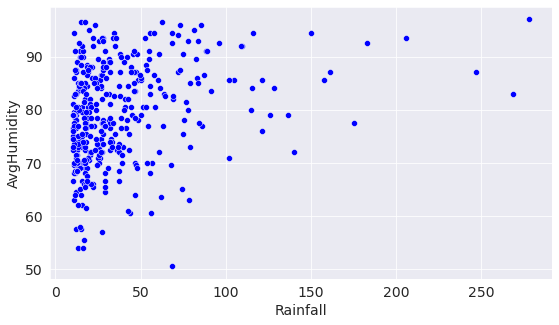

In [63]:
#Cairns
sns.scatterplot(x=rainfall_df.Rainfall.iloc[87200:90239][rainfall_df.Rainfall>10].head(1000), 
                y=rainfall_df.AvgHumidity.iloc[87200:90239][rainfall_df.Rainfall>10].head(1000), color = 'Blue');

It is seen that, when the amount of rainfall increases the humidity always increase. On the other hand, for lower rainfall humidity should be lower theoretically though some higher values are of humidity is observed in the dataset for cairns. Maybe it is due to other factors that control humidity. 

#### Q5: What is the pressure distribution in Australia?

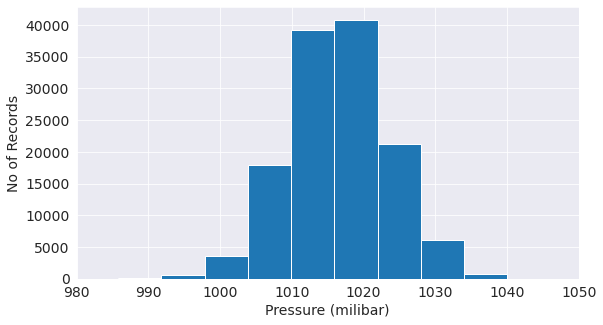

In [75]:
plt.hist(rainfall_df.AvgPressure)
plt.xlabel('Pressure (milibar)')
plt.ylabel('No of Records')
plt.xlim(980,1050);

Pressure is normally distributed as shown in the above figure

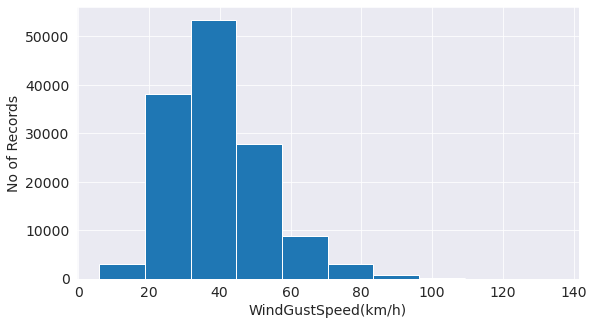

In [103]:
plt.hist(rainfall_df.WindGustSpeed)
plt.xlabel('WindGustSpeed(km/h)')
plt.ylabel('No of Records');

Distribution is skewed towards left a little for WindGustSpeed. 

#### Q6: What is the trend of yearly rainfall?
To draw the trendline of rainfall in throughout 10 years we will first write some basic python for loop to create our list for plotting. Following that using matplotlib we will draw the graph. 

In [104]:
year_no = [x for x in range(2007,2018)]
rainfall_sum = []
records_count = []
rainfall_mean = []
for x in range(2007,2018):
    rainfall_sum.append(rainfall_df.Rainfall[rainfall_df.year == x].sum())
    records_count.append(rainfall_df.Rainfall[rainfall_df.year == x].count())
    rainfall_mean.append(rainfall_df.Rainfall[rainfall_df.year == x].mean())


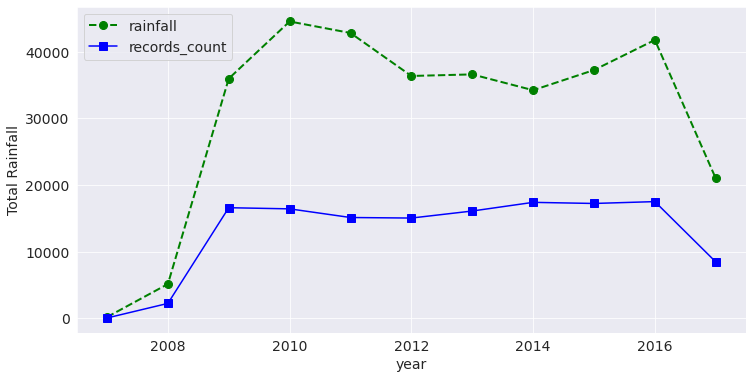

In [105]:
plt.figure(figsize=(12,6))
plt.plot(year_no, rainfall_sum, 'go--', linewidth=2, markersize=8)
plt.plot(year_no,records_count, 'bs-', markersize = 8)
plt.xlabel('year')
plt.ylabel('Total Rainfall')
plt.legend(['rainfall', 'records_count']);

The rainfall variation is clear from the picture. In the first two years and the last year, number of records are relatively low. So yearly rainfall is also low for them. Otherwise records count were very similar but we saw little variation. the most rainfall was recorded for 2010 and 2011. 

Let us save and upload our work to Jovian before continuing.

## Inferences and Conclusion

1. Cairns is the most rainy region of the country in 10 years while woomera is the most arid region.
2. The maximum rainfall occurred in the period between 2010-2011 and not surprisingly mean rainfall was most in this period. 
3. The most humid month is June in this period.
4. The most mean rainfall was in February for the period. 
5. Rainfall has significant effect on increased humidity.

In [ ]:
import jovian

In [108]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sheikhasif-buet13/rainfall-analysis-in-australia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia


'https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia'

## References and Future Work

References:
1. https://medium.com/@anusha.gajinkar/exploratory-data-analysis-of-indian-rainfall-data-f9755f2cc81d
2. https://towardsdatascience.com/moving-averages-in-python-16170e20f6c
3. https://www.youtube.com/watch?v=kmE3zxOgl_U&t=610s
4. https://www.smartfog.com/how-rain-and-humidity-connected.html
5. https://www.researchgate.net/figure/Exploratory-data-analysis-EDA-of-rainfall-dataset-a-Histogram-with-the-nonparametric_fig5_329235715

This data can be merged with run-off data and from that lots of other insights can be drawn. If we can collect some other parameters like duration and intensity of rainfall we can generate IDF curve. This data can also be used in machine learning project like rainfall prediction. Also, statistical modeling can be applied with some additional data adding and manipulation. 

In [ ]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sheikhasif-buet13/rainfall-analysis-in-australia" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia


'https://jovian.ai/sheikhasif-buet13/rainfall-analysis-in-australia'